# 2020 Playoff Prediction EDA
In this exploratory data analysis, I will be using NBA team data from 1980-2019 to develop a regression based on regular season statistics that predict playoff wins by a team.

## Import libraries

In [1]:
# Load new packages
! pip install streamlit
! pip install scikit-learn

In [2]:
import pandas as pd
import seaborn as sb
import sklearn as sk
import matplotlib.pyplot as plt
import plotly as pl
import plotly.express as px
import statsmodels.formula.api as sm
import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
plt.style.use('fivethirtyeight')

In [3]:
! git clone https://github.com/roclark/sportsreference

fatal: destination path 'sportsreference' already exists and is not an empty directory.


In [4]:
cd sportsreference

/Users/tjsmith99/Portfolio/sportsAnalytics/2020PlayoffPrediction/sportsreference


In [5]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [6]:
from sportsreference.nba.teams import Teams
from sportsreference.nba.schedule import Schedule

## Load data

In [7]:
os.chdir('../')

print(os.getcwd())

/Users/tjsmith99/Portfolio/sportsAnalytics/2020PlayoffPrediction


In [8]:
data = pd.read_csv('data/all_data1980-2019.csv')
pred_data = pd.read_csv('data/data2020.csv')

## Explore

In [9]:
data.head()

,abbreviation,assists,blocks,defensive_rebounds,field_goal_attempts,field_goal_percentage,field_goals,free_throw_attempts,free_throw_percentage,free_throws,...,losses,games,playoff_wins,playoff_games,eFG%,MOV,opp_eFG%,TOV%,opp_TOV%,W-L%
0,MIL,2136,486,3316,7471,0.476,3555,1904,0.773,1471,...,22,82,10,15,0.550,727,0.503,0.120,0.115,0.732
1,GSW,2413,525,2990,7361,0.491,3612,1672,0.801,1339,...,25,82,14,22,0.565,530,0.508,0.126,0.117,0.695
2,NOP,2216,441,2969,7563,0.473,3581,1921,0.761,1462,...,49,82,0,0,0.529,-109,0.532,0.126,0.116,0.402
3,PHI,2207,432,3025,7233,0.471,3407,2258,0.771,1742,...,31,82,7,12,0.532,221,0.512,0.129,0.111,0.622
4,LAC,1970,385,2936,7178,0.471,3384,2340,0.792,1853,...,34,82,2,6,0.529,70,0.514,0.127,0.114,0.585


## Clean data

In [10]:
# Team Stat categories
data.columns

Index(['abbreviation', 'assists', 'blocks', 'defensive_rebounds',
       'field_goal_attempts', 'field_goal_percentage', 'field_goals',
       'free_throw_attempts', 'free_throw_percentage', 'free_throws',
       'games_played', 'minutes_played', 'name', 'offensive_rebounds',
       'opp_assists', 'opp_blocks', 'opp_defensive_rebounds',
       'opp_field_goal_attempts', 'opp_field_goal_percentage',
       'opp_field_goals', 'opp_free_throw_attempts',
       'opp_free_throw_percentage', 'opp_free_throws',
       'opp_offensive_rebounds', 'opp_personal_fouls', 'opp_points',
       'opp_steals', 'opp_three_point_field_goal_attempts',
       'opp_three_point_field_goal_percentage', 'opp_three_point_field_goals',
       'opp_total_rebounds', 'opp_turnovers',
       'opp_two_point_field_goal_attempts',
       'opp_two_point_field_goal_percentage', 'opp_two_point_field_goals',
       'personal_fouls', 'points', 'rank', 'steals',
       'three_point_field_goal_attempts', 'three_point_field_goa

In [11]:
data = data[['abbreviation', 'assists', 'blocks', 'defensive_rebounds',
       'field_goal_attempts', 'field_goal_percentage', 'field_goals',
       'free_throw_attempts', 'free_throw_percentage', 'free_throws',
       'games_played', 'offensive_rebounds',
       'opp_assists', 'opp_blocks', 'opp_defensive_rebounds',
       'opp_field_goal_attempts', 'opp_field_goal_percentage',
       'opp_field_goals', 'opp_free_throw_attempts',
       'opp_free_throw_percentage', 'opp_free_throws',
       'opp_offensive_rebounds', 'opp_personal_fouls', 'opp_points',
       'opp_steals', 'opp_three_point_field_goal_attempts',
       'opp_three_point_field_goal_percentage', 'opp_three_point_field_goals',
       'opp_total_rebounds', 'opp_turnovers',
       'opp_two_point_field_goal_attempts',
       'opp_two_point_field_goal_percentage', 'opp_two_point_field_goals',
       'personal_fouls', 'points', 'steals',
       'three_point_field_goal_attempts', 'three_point_field_goal_percentage',
       'three_point_field_goals', 'total_rebounds', 'turnovers',
       'two_point_field_goal_attempts', 'two_point_field_goal_percentage',
       'two_point_field_goals', 'year', 'wins', 'losses', 'games',
       'playoff_wins', 'playoff_games', 'eFG%', 'MOV', 'opp_eFG%', 'TOV%',
       'opp_TOV%', 'W-L%']]

In [12]:
#finding variables that have a Pearson's Correlation Coefficient of at least medium strength with number of playoff wins
corr = data.corr().abs()
corr = corr.loc[corr['playoff_wins']>.25]
corr.index

Index(['field_goal_percentage', 'opp_blocks', 'opp_field_goal_percentage',
       'opp_two_point_field_goal_percentage',
       'two_point_field_goal_percentage', 'wins', 'losses', 'playoff_wins',
       'playoff_games', 'eFG%', 'MOV', 'opp_eFG%', 'W-L%'],
      dtype='object')

In [13]:
data = data[['abbreviation','field_goal_percentage', 'opp_blocks', 'opp_field_goal_percentage',
       'opp_two_point_field_goal_percentage',
       'two_point_field_goal_percentage', 'wins', 'losses', 'playoff_wins',
       'playoff_games', 'eFG%', 'MOV', 'opp_eFG%', 'W-L%']]
pred_data = pred_data[['abbreviation','field_goal_percentage', 'opp_blocks', 'opp_field_goal_percentage',
       'opp_two_point_field_goal_percentage',
       'two_point_field_goal_percentage', 'wins', 'losses', 'playoff_wins',
       'playoff_games', 'eFG%', 'MOV', 'opp_eFG%', 'W-L%']]

## Relationship between variables and number of playoff wins

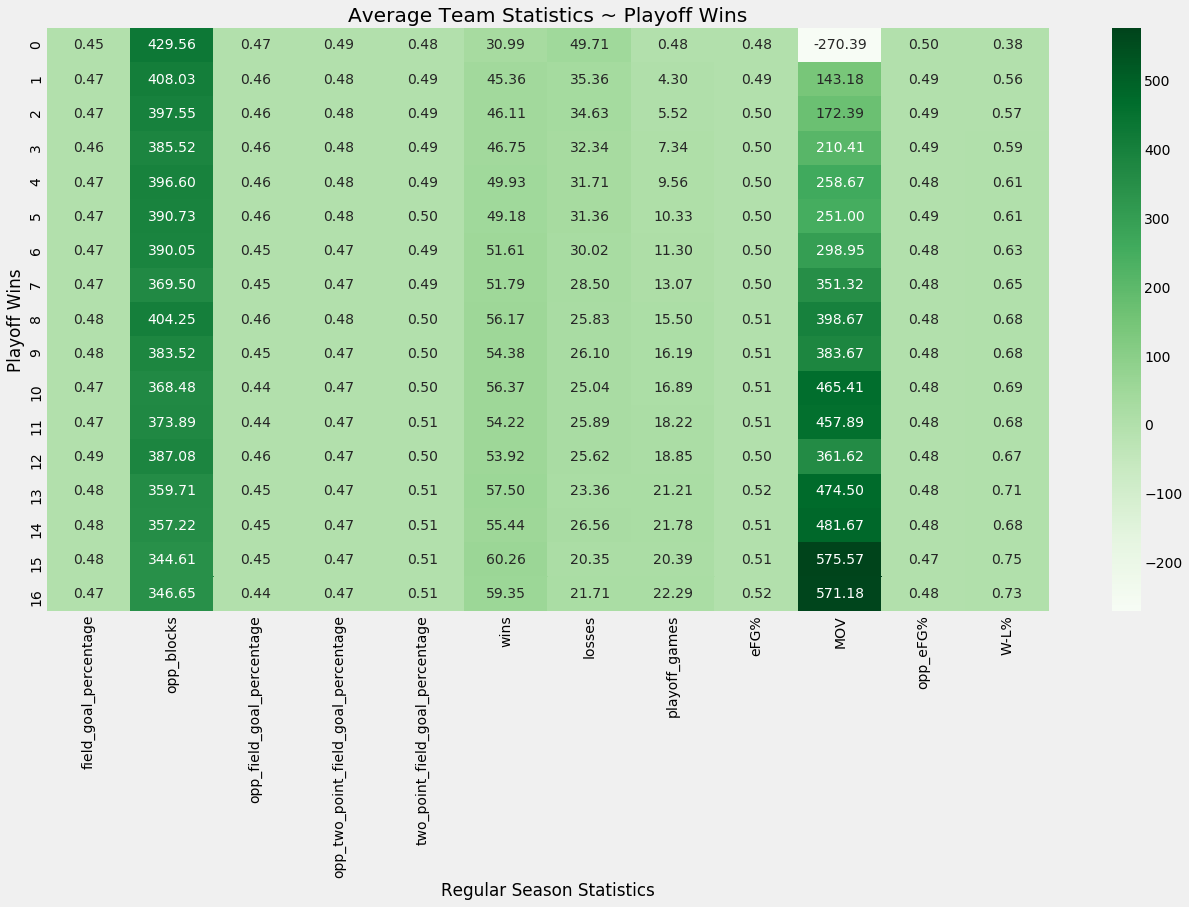

In [30]:
variables = list(corr.index)
corr_df = data[variables].groupby('playoff_wins').mean()
corr_df
plt.figure(figsize = (20,10))
plt.title('Average Team Statistics ~ Playoff Wins')
sb.heatmap(data=corr_df,annot=True, cmap='Greens',fmt = '.2f')
plt.ylabel('Playoff Wins')
plt.xlabel('Regular Season Statistics')
plt.savefig('teamstat_avg.png')

## Multicollinearity Check

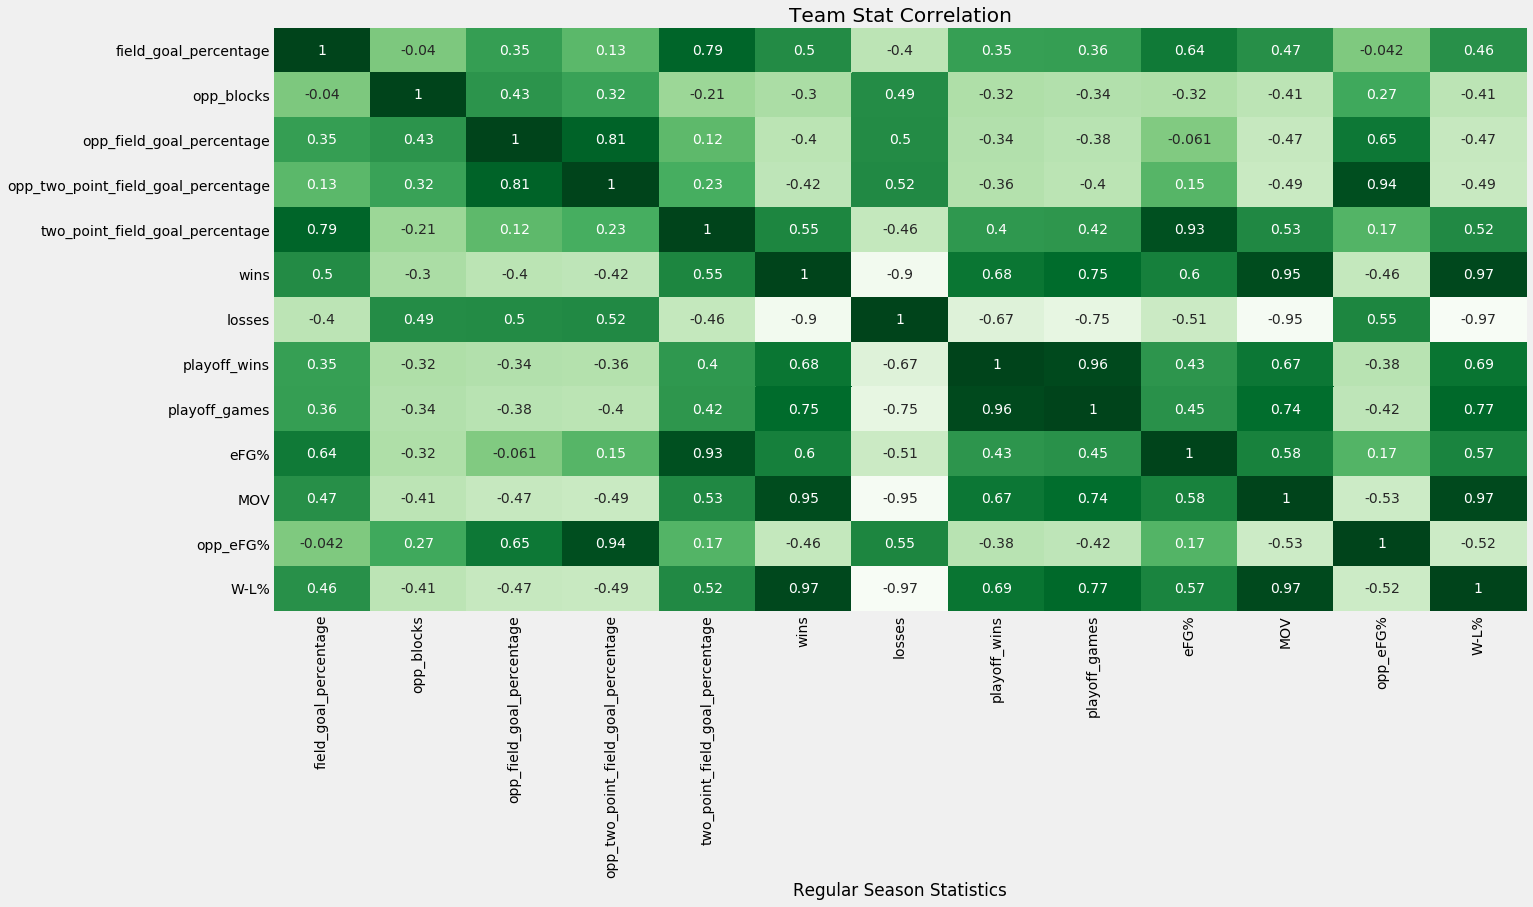

In [32]:
plt.figure(figsize=(20,10))
plt.title("Team Stat Correlation")
sb.heatmap(data=data[variables].corr(), cmap='Greens', cbar=False, annot=True)
plt.xlabel('Regular Season Statistics')
plt.savefig('teamstat_corr.png')

# Modeling

In [16]:
x = data[variables].drop(columns = ['playoff_wins','playoff_games'])
y = data['playoff_wins']

pred_x = pred_data[variables].drop(columns = ['playoff_wins','playoff_games'])

x.head()

,field_goal_percentage,opp_blocks,opp_field_goal_percentage,opp_two_point_field_goal_percentage,two_point_field_goal_percentage,wins,losses,eFG%,MOV,opp_eFG%,W-L%
0,0.476,395,0.433,0.479,0.565,60,22,0.550,727,0.503,0.732
1,0.491,295,0.444,0.500,0.557,57,25,0.565,530,0.508,0.695
2,0.473,445,0.466,0.525,0.536,33,49,0.529,-109,0.532,0.402
3,0.471,336,0.455,0.511,0.529,51,31,0.532,221,0.512,0.622
4,0.471,498,0.457,0.513,0.507,48,34,0.529,70,0.514,0.585


In [17]:
# train the data
x_train, x_valid, y_train, y_valid = train_test_split(x,y)

## Linear regression

In [18]:
lg_model = linear_model.LinearRegression()
lg_model.fit(x_train, y_train)
lg_predicted_wins = lg_model.predict(x_valid)
print("Mean Absolute Error: " + str(mean_absolute_error(lg_predicted_wins, y_valid)))

Mean Absolute Error: 2.249950173031143


In [19]:
lg_predicted_wins = lg_model.predict(pred_x)
lg_predicted_wins

array([ 5.66642267, 10.1476576 ,  6.54830844,  3.24198389,  0.22257921,
        3.16752521,  6.55016875,  1.23361773,  4.39722218,  2.09432111,
        5.94999409, -0.17956027,  5.99505137,  7.08063851,  8.80610619,
        6.1968422 ,  2.47785567,  5.58738649,  5.71308386,  6.7853286 ,
        6.20793004,  4.21548704, -0.62308151, -0.34155848,  2.88120514,
       -0.65968406, -0.54391979,  2.55427569, -1.78253947, -0.1595826 ])

### Linear regression predictions

In [20]:
lg_pred_wins_df = pred_data[['abbreviation','playoff_wins']]
i=0
while i<22:
    lg_pred_wins_df.at[i,'playoff_wins'] = lg_predicted_wins[i]
    i+=1
lg_pred_wins_df.sort_values(by='playoff_wins', ascending=False)

,abbreviation,playoff_wins
1,MIL,10
14,LAL,8
13,TOR,7
15,DEN,6
2,HOU,6
20,OKC,6
19,UTA,6
6,LAC,6
12,BOS,5
18,IND,5


# Produce Final List
Include only Bubble teams

Western Conference:
Los Angeles Lakers
Los Angeles Clippers
Denver Nuggets
Utah Jazz 
Oklahoma City Thunder
Houston Rockets
Dallas Mavericks
Memphis Grizzlies
Portland Trail Blazers
New Orleans Pelicans
Sacramento Kings
San Antonio Spurs
Phoenix Suns

Eastern Conference:
Milwaukee Bucks
Toronto Raptors
Boston Celtics
Miami Heat
Indiana Pacers
Philadelphia 76ers
Brooklyn Nets
Orlando Magic
Washington Wizards

In [22]:
lg_pred_wins_df.columns = ['Team','Playoff Wins']
nba2020pred_wins = lg_pred_wins_df.drop(lg_pred_wins_df.index[[4,11,22,23,25,26,28,29]])
nba2020pred_wins.sort_values(by='Playoff Wins', ascending=False)

,Team,Playoff Wins
1,MIL,10
14,LAL,8
13,TOR,7
2,HOU,6
20,OKC,6
19,UTA,6
6,LAC,6
15,DEN,6
18,IND,5
17,PHI,5


In [71]:
fig = px.bar(nba2020pred_wins, x='Team', y='Playoff Wins')
fig.update_layout(title='2020 NBA Playoff Win Predictions', xaxis={'categoryorder':'total ascending'})
fig.update_traces(marker_color='green')

# Conclusion

## Summary

Using NBA team statistics from 1980 to 2019, I have attempted to predict the wins for the 2020 NBA Playoffs. Upon removing non-Bubble teams, a dataframe of predicted wins for the final 22 teams are provided. Based on this list the 2020 NBA champions will be the Milwaukee Bucks. The runners-up will be the Los Angeles Lakers. 

Given the correlation heat map, the regular season statistics with the best correlation (>0.5) with playoff wins are wins, losses, margin of victory (MOV), and win-loss %. The number of playoff games are the strongest according to the chart, but as this stat is not a regular season number we will disregard it. Using ESPN.com's NBA Standings, both the Bucks and Lakers lead the league in wins, (lack of) losses, margin of victory, and winning %. As such, it makes sense that they would be the final two. The interesting prediction is the number three spot: Toronto.

Based on MOV, the Raptors should be below the Clippers. Additionally, if you consider the star power of Paul George, Kawhi Leonard, and others on the Clips it would be acceptable to think the Raptors would finish behind them. However, the Raptors have more wins and a higher winning % than the Clippers so the model considered this and awarded them an extra win. 

It was additionally shocking to see that Washington Wizards won a game while neither the Kings nor Magic did. While the Wizards are above elimination in terms of wins and winning %, their MOV is within the eliminated teams range, a whopping -4.0. The Kings and Magic have a MOV of -1.9 and -0.9, respectively. This leads me to believe there are some concerns in the final predictions. 

Overall, though I'm excited to see how this bubble plays out and believes this model will predict and show that the team with the most playoff wins will prevail. As such, your 2020 NBA champion will be the $Milwaukee Bucks$

## Concerns
I have two concerns with this data: the undefined playoff teams and the lack of a "strong" correlation. A correlation is usually considered strong if the $R^2 value is greater than 0.7. Several are close, but none are above 0.7 (excluding playoff games). Without a strong correlating value, my confidence is shaken a bit. We may see increased correlations if data from before 1980 was used or if more statistics were used. 

Outside of the data, my list of teams includes all bubble teams and in calculations, all teams in general. Once the official playoffs begin, and the final 16 teams are decided the predictions may change. The new final list of teams could be used to create an even more accurate prediction.

## Future
As mentioned in the concerns, I believe that changing the teams included in the dataframe for the 2020 playoffs will change the predicted playoff wins. Once the final teams are decided, I will rerun the simulation and develop another prediction.